<a href="https://colab.research.google.com/github/gamzesever/GlobalAIHubMachineLearningCourse/blob/main/final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Gerekli kütüphanelerin kurulması**

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv("https://raw.githubusercontent.com/globalaihub/introduction-to-machine-learning/main/Final%20Project/diamonds.csv")

In [3]:
data

,index,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43,Very Low
1,2,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31,Very Low
2,3,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31,Very Low
3,4,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63,Very Low
4,5,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75,Very Low
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,5.75,5.76,3.50,Very Low
53936,53937,0.72,Good,D,SI1,63.1,55.0,5.69,5.75,3.61,Very Low
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,5.66,5.68,3.56,Very Low
53938,53939,0.86,Premium,H,SI2,61.0,58.0,6.15,6.12,3.74,Very Low


**Veri setinin incelenmesi**

In [4]:
data.head()

,index,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43,Very Low
1,2,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31,Very Low
2,3,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31,Very Low
3,4,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63,Very Low
4,5,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75,Very Low


In [5]:
data.info

<bound method DataFrame.info of        index  carat        cut color clarity  ...  table     x     y     z     price
0          1   0.23      Ideal     E     SI2  ...   55.0  3.95  3.98  2.43  Very Low
1          2   0.21    Premium     E     SI1  ...   61.0  3.89  3.84  2.31  Very Low
2          3   0.23       Good     E     VS1  ...   65.0  4.05  4.07  2.31  Very Low
3          4   0.29    Premium     I     VS2  ...   58.0  4.20  4.23  2.63  Very Low
4          5   0.31       Good     J     SI2  ...   58.0  4.34  4.35  2.75  Very Low
...      ...    ...        ...   ...     ...  ...    ...   ...   ...   ...       ...
53935  53936   0.72      Ideal     D     SI1  ...   57.0  5.75  5.76  3.50  Very Low
53936  53937   0.72       Good     D     SI1  ...   55.0  5.69  5.75  3.61  Very Low
53937  53938   0.70  Very Good     D     SI1  ...   60.0  5.66  5.68  3.56  Very Low
53938  53939   0.86    Premium     H     SI2  ...   58.0  6.15  6.12  3.74  Very Low
53939  53940   0.75      Ideal   

In [6]:
data.shape

(53940, 11)

In [7]:
data=pd.DataFrame(data)

In [8]:
data.describe()

,index,carat,depth,table,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,10.740000,58.900000,31.800000


veri setinin açıklayıcı istatistiklerine bakıldığında, z değişkeninde bir outlier olabileceği yorumunu yapabiliriz. 

Veri setinde "missing value" var mı?

In [9]:
data.isna().sum()

index      0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [10]:

data.groupby(by="price").count()

,index,carat,cut,color,clarity,depth,table,x,y,z
price,,,,,,,,,,
High,2308,2308,2308,2308,2308,2308,2308,2308,2308,2308
Low,11271,11271,11271,11271,11271,11271,11271,11271,11271,11271
Medium,4109,4109,4109,4109,4109,4109,4109,4109,4109,4109
Very High,1589,1589,1589,1589,1589,1589,1589,1589,1589,1589
Very Low,34663,34663,34663,34663,34663,34663,34663,34663,34663,34663


burada sınıflandırmada kullanacağımız label değişkenimiz "price" a göre veri setinin numerik olarak dağılımı incelenmiştir. 

In [11]:
data.duplicated().sum()

0

burada tekrar eden verilerin varlığı incelenmiştir. 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


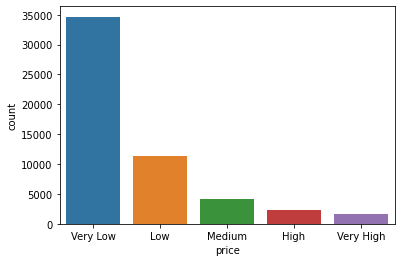

In [12]:
sns.countplot(data.price)

grafikte price değişkeni içindeki sınıfların numerik değerleri göserilmektedir. buna göre veri setinde, sınıflar arasında bir imbalance durumu gözlenmektedir. bu durum algoritmamızın gücünü azaltarak overfitting problemine neden olabilir. bu problemden kaşınmak için sınıfların sayısal değerlerinin eşitlenmesi için çalışmalar eklenmesi model performanslarını artıracaktır. 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

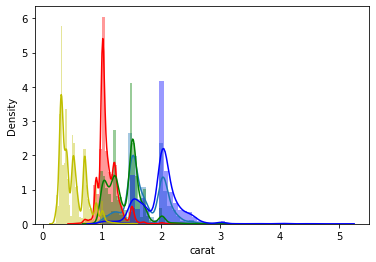

In [13]:
sns.distplot(data[data.price == "High"].carat)
sns.distplot(data[data.price == "Low"].carat,color="r")
sns.distplot(data[data.price == "Medium"].carat,color="g")
sns.distplot(data[data.price == "Very High"].carat, color="b")
sns.distplot(data[data.price == "Very Low"].carat,color="y")




grafikte price değişkeni içindeki 5 sınıfın carat değişkenine göre dağılı gösterilmiştir. bu grafikten anlaşılacağı gibi sınıflama algoritmaları seçilirken sarı renk ile işaretlenen "very low" değişkeni baz alınarak yaklaşıl 0.5 değeri ile sınıflandırmaya başlanabilir. 

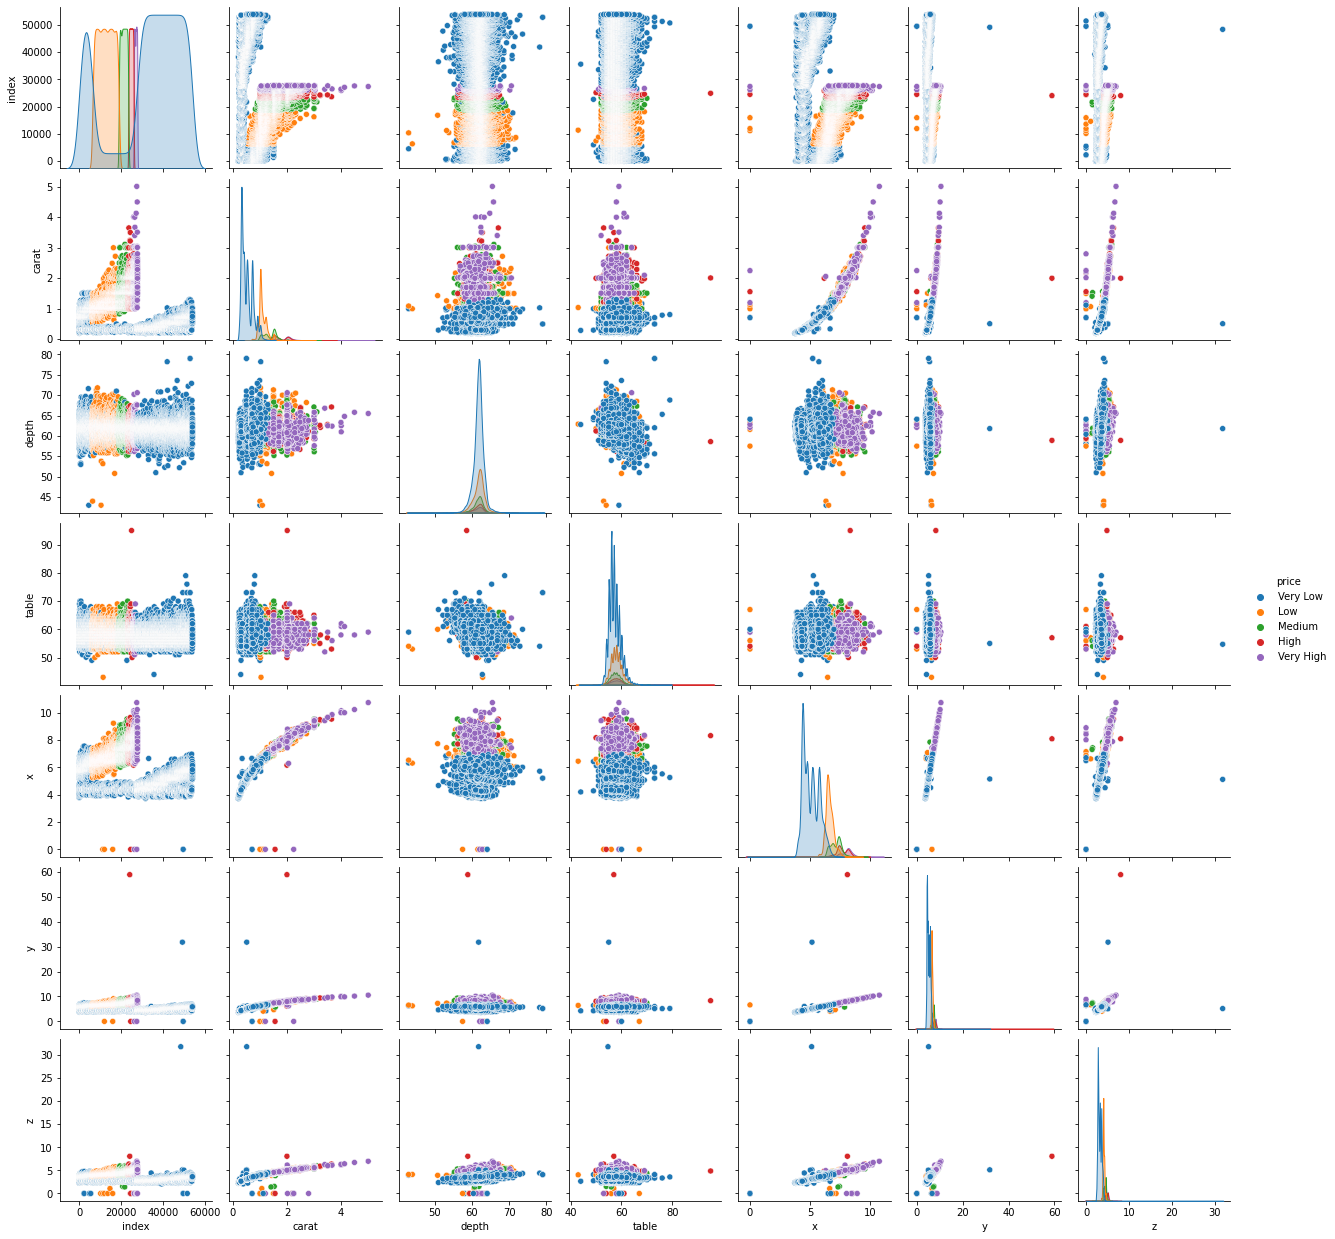

In [14]:
sns.pairplot(data, hue="price")

bu grafiklerde label değişkenine göre veri setindeki diğer değişkenlerin ikili grafikleri gösterilmektedir. bu grafikler değişkenler arasındaki bağlantılar ve değişkenlerin dağılımı hakkında yorum yapmamıza olanak sağlar. 

In [15]:
corr= data.corr()
corr

,index,carat,depth,table,x,y,z
index,1.000000,-0.377983,-0.034800,-0.100830,-0.405440,-0.395843,-0.399208
carat,-0.377983,1.000000,0.028224,0.181618,0.975094,0.951722,0.953387
depth,-0.034800,0.028224,1.000000,-0.295779,-0.025289,-0.029341,0.094924
table,-0.100830,0.181618,-0.295779,1.000000,0.195344,0.183760,0.150929
x,-0.405440,0.975094,-0.025289,0.195344,1.000000,0.974701,0.970772
y,-0.395843,0.951722,-0.029341,0.183760,0.974701,1.000000,0.952006
z,-0.399208,0.953387,0.094924,0.150929,0.970772,0.952006,1.000000


korelasyon matrisi ile değişkenler arasındaki ilişkinin gücünü ve yönünü inceleyebiliriz. bu tabloya göre bir çok değeri +-0.9 civarında olması değişkenler arasında çoklu bağlantı (multicolinearity) olduğunu ortaya koymaktadır. Çoklu bağlantı durumunda ise, özellik seçiminde model için anlamlı olmayan değişkenlerin modele alınması, bu nedenle de model performansının düşük çıkması söz konusudur. Multicollierity varlığnda Regularization algoritmalarının kullanılması optimal modelin tespit edilmesine olanak sağlamaktadır. 


Aşağıdaki grafikte değişkenler arasındaki korelasyon görsel olarak verilmiştir. 

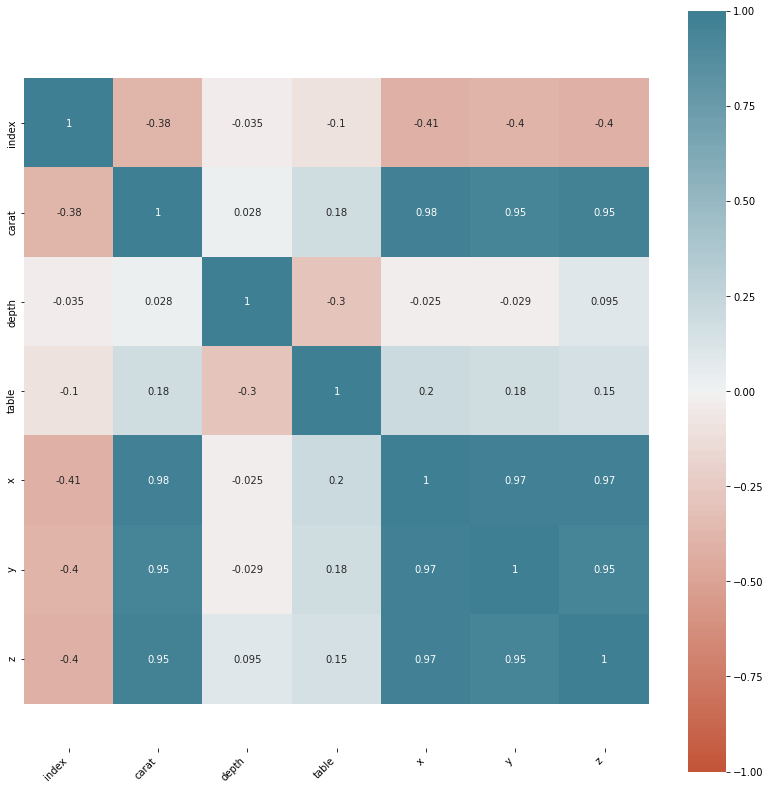

In [16]:
plt.figure(figsize=(14, 14))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True, annot = True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
ax.set_ylim(len(corr)+0.5, -0.5);

In [17]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

**Kategorik Verilerin Numerik olarak etiketlenmesi**

In [18]:
#Encoding the label
label_encoder = LabelEncoder()
data["Lprice"] = label_encoder.fit_transform(data["price"]) 
data.head()

,index,carat,cut,color,clarity,depth,table,x,y,z,price,Lprice
0,1,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43,Very Low,4
1,2,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31,Very Low,4
2,3,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31,Very Low,4
3,4,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63,Very Low,4
4,5,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75,Very Low,4


In [ ]:
categories = list(label_encoder.inverse_transform(data["Lprice"]))
categories

In [20]:

data["Lprice"].value_counts()

4    34663
1    11271
2     4109
0     2308
3     1589
Name: Lprice, dtype: int64

In [21]:
data["Lcut"] = label_encoder.fit_transform(data["cut"]) 
data.head()

,index,carat,cut,color,clarity,depth,table,x,y,z,price,Lprice,Lcut
0,1,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43,Very Low,4,2
1,2,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31,Very Low,4,3
2,3,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31,Very Low,4,1
3,4,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63,Very Low,4,3
4,5,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75,Very Low,4,1


In [22]:
data["Lcolor"] = label_encoder.fit_transform(data["color"]) 
data.head()

,index,carat,cut,color,clarity,depth,table,x,y,z,price,Lprice,Lcut,Lcolor
0,1,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43,Very Low,4,2,1
1,2,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31,Very Low,4,3,1
2,3,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31,Very Low,4,1,1
3,4,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63,Very Low,4,3,5
4,5,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75,Very Low,4,1,6


In [23]:
data["Lclarity"] = label_encoder.fit_transform(data["clarity"]) 
data.head()

,index,carat,cut,color,clarity,depth,table,x,y,z,price,Lprice,Lcut,Lcolor,Lclarity
0,1,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43,Very Low,4,2,1,3
1,2,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31,Very Low,4,3,1,2
2,3,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31,Very Low,4,1,1,4
3,4,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63,Very Low,4,3,5,5
4,5,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75,Very Low,4,1,6,3


In [24]:
# gerekli olmayan sütunların modelden çıkarılması
clases = list(set(data.price))
data.drop(["index","cut", "color","clarity","price"], axis=1, inplace=True)

In [25]:
data.head()

,carat,depth,table,x,y,z,Lprice,Lcut,Lcolor,Lclarity
0,0.23,61.5,55.0,3.95,3.98,2.43,4,2,1,3
1,0.21,59.8,61.0,3.89,3.84,2.31,4,3,1,2
2,0.23,56.9,65.0,4.05,4.07,2.31,4,1,1,4
3,0.29,62.4,58.0,4.20,4.23,2.63,4,3,5,5
4,0.31,63.3,58.0,4.34,4.35,2.75,4,1,6,3


In [ ]:
data.shape

(53940, 10)

In [26]:
# Locate features and label
X, y = data.iloc[ :,  :-4], data.iloc[: , -4]

In [27]:
X["Lcut"]=data.Lcut

In [28]:
X["Lcolor"]=data.Lcolor

In [29]:
X["Lclarity"]=data.Lclarity

In [30]:
X

,carat,depth,table,x,y,z,Lcut,Lcolor,Lclarity
0,0.23,61.5,55.0,3.95,3.98,2.43,2,1,3
1,0.21,59.8,61.0,3.89,3.84,2.31,3,1,2
2,0.23,56.9,65.0,4.05,4.07,2.31,1,1,4
3,0.29,62.4,58.0,4.20,4.23,2.63,3,5,5
4,0.31,63.3,58.0,4.34,4.35,2.75,1,6,3
...,...,...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,5.75,5.76,3.50,2,0,2
53936,0.72,63.1,55.0,5.69,5.75,3.61,1,0,2
53937,0.70,62.8,60.0,5.66,5.68,3.56,4,0,2
53938,0.86,61.0,58.0,6.15,6.12,3.74,3,4,3


In [31]:
y

0        4
1        4
2        4
3        4
4        4
        ..
53935    4
53936    4
53937    4
53938    4
53939    4
Name: Lprice, Length: 53940, dtype: int64

**veri setinin train ve test seti olarak ayrılması**

In [32]:
#Splitting dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=123)

**Enseble Learning**

burada Support Vector machine, KNN ve Random Forest Classification algoritmaları aynı anda çalıştırılmıştır. 

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold
from collections import defaultdict
models_dict = {'random_forest':     RandomForestClassifier(n_estimators=50),
               'svm': SVC(),
               'knn': KNeighborsClassifier(n_neighbors=11)}

In [ ]:
def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=1)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, verbose=1, n_jobs=3, error_score='raise')
    return scores
model_scores = defaultdict()
for name, model in models_dict.items():
    print('Evaluating {}'.format(name))
    scores = evaluate_model(model, X, y)
    model_scores[name] = scores

Evaluating random_forest


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:   20.1s finished
[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.


Evaluating svm


/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:  6.9min finished
[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.


Evaluating knn


[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    9.6s finished


In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification
import plotly.graph_objects as go
%matplotlib inline


In [ ]:
import plotly.io as pio

In [ ]:
def plot_results(model_scores, name):
    
    model_names = list(model_scores.keys())
    results = [model_scores[model] for model in model_names]
    fig = go.Figure()
    for model, result in zip(model_names, results):
        fig.add_trace(go.Box(
            y=result,
            name=model,
            boxpoints='all',
            jitter=0.5,
            whiskerwidth=0.2,
            marker_size=2,
            line_width=1)
        )
    
    fig.update_layout(
    title='Performance of Different Models Using 5-Fold Cross-Validation',
    paper_bgcolor='rgb(243, 243, 243)',
    plot_bgcolor='rgb(243, 243, 243)',
    xaxis_title='Model',
    yaxis_title='Accuracy',
    showlegend=False)
    fig.show()
    
plot_results(model_scores, name='base_models_cv')

yukarıdaki şekilde verilen algoritmaların sonuçlarına göre, veri setimizin modellenmesinde random_forest algoritması 0,93 accuracy değeri ile daha iyi performans göstermektedir. 

**Desicion Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(max_depth=4, random_state=42)
clf.fit(X_train,y_train)
print("Accuracy of train:",clf.score(X_train,y_train))
print("Accuracy of test:",clf.score(X_test,y_test))


Accuracy of train: 0.8667644373114918
Accuracy of test: 0.8655131734172238


train ve test setimizin accuracy değerleri 0,86 olarak hesaplanmıştr. Bu algoritmamızın iyi çalıştığını gösterir. 

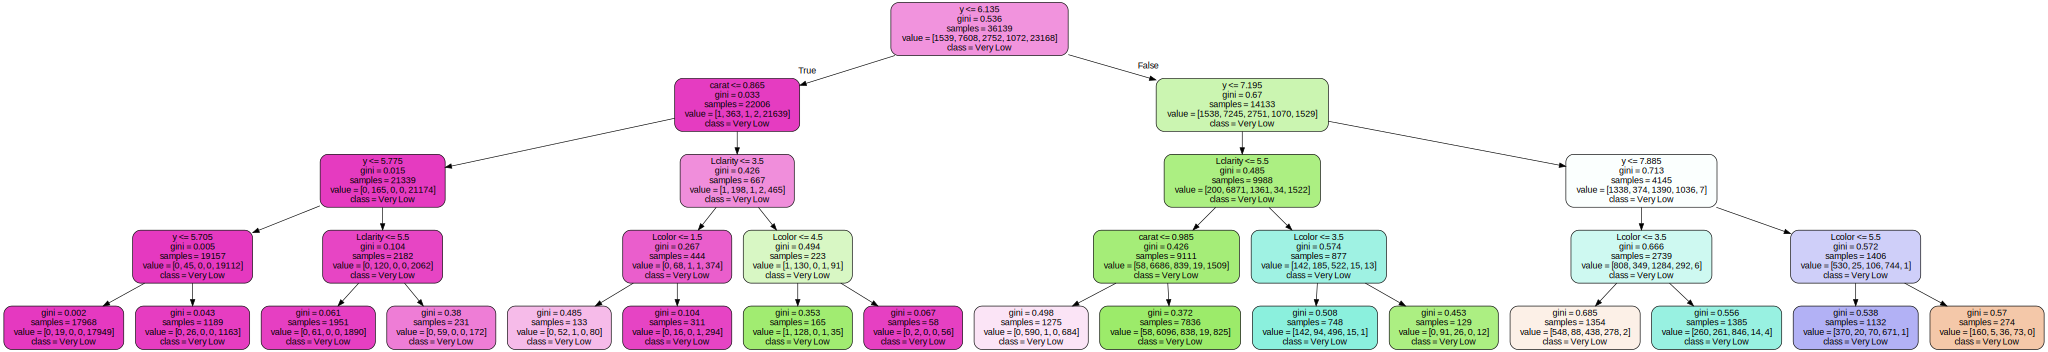

In [ ]:

import os
from sklearn.tree import export_graphviz
os.environ["PATH"] += ';' + r'C:\Users\Dell\Anaconda3\Library\bin\graphviz'

import graphviz

dot_data = export_graphviz(clf, out_file=None,
                     feature_names=X.columns,
                     class_names=categories,
                     filled=True, rounded=True)
graph = graphviz.Source(dot_data)
graph

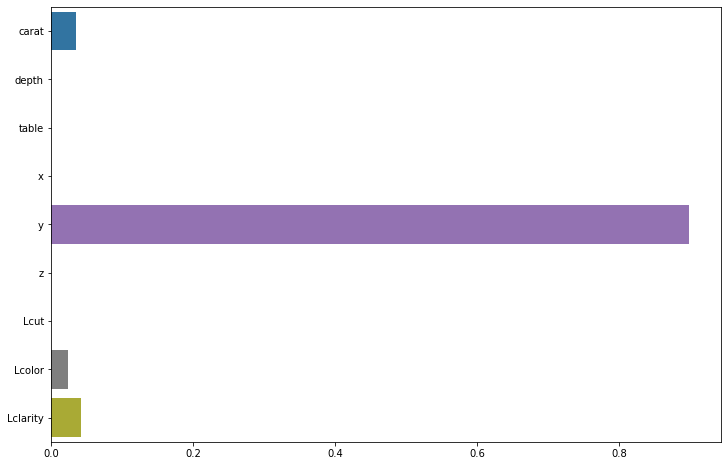

In [ ]:
#Feature Importance
plt.figure(figsize=(12, 8))
importance = clf.feature_importances_
sns.barplot(x=importance, y=X.columns)
plt.show()

In [ ]:
# Classification Report
from sklearn.metrics import precision_score, recall_score, accuracy_score, classification_report, f1_score
pred = clf.predict(X_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.48      0.51      0.49       769
           1       0.76      0.81      0.79      3663
           2       0.63      0.47      0.54      1357
           3       0.59      0.61      0.60       517
           4       0.96      0.96      0.96     11495

    accuracy                           0.87     17801
   macro avg       0.68      0.67      0.68     17801
weighted avg       0.86      0.87      0.86     17801



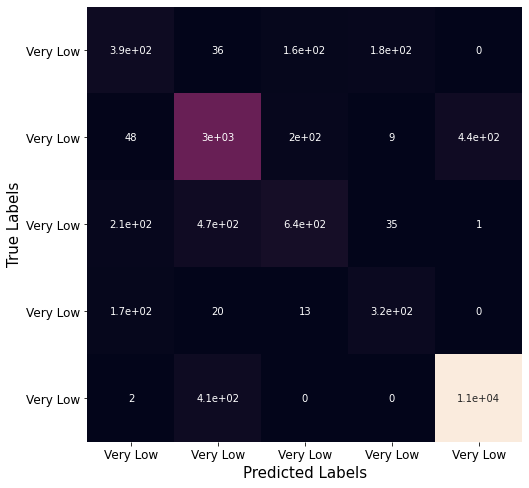

In [ ]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, pred)
plt.figure(figsize=(12, 8))
ax =sns.heatmap(cm, square=True, annot=True, cbar=False)
ax.xaxis.set_ticklabels(categories, fontsize = 12)
ax.yaxis.set_ticklabels(categories, fontsize = 12, rotation=0)
ax.set_xlabel('Predicted Labels',fontsize = 15)
ax.set_ylabel('True Labels',fontsize = 15)
plt.show()


**XGBBoost Method**

In [ ]:
import xgboost as xgb

In [ ]:
dmatrix_train = xgb.DMatrix(data=X_train, label=y_train)
dmatrix_test = xgb.DMatrix(data=X_test, label=y_test)

In [ ]:
param = {'max_depth':3, 
         'eta':1, 
         'objective':'multi:softprob', 
         'num_class':5}

num_round = 5
model = xgb.train(param, dmatrix_train, num_round)

In [ ]:
preds = model.predict(dmatrix_test)
preds[:10]


array([[9.5532741e-04, 1.7586333e-03, 9.6336071e-04, 9.9095446e-04,
        9.9533170e-01],
       [5.0107192e-04, 9.2240813e-04, 5.3915463e-04, 5.1975815e-04,
        9.9751759e-01],
       [1.2814177e-02, 8.9554524e-01, 4.4959579e-02, 9.7891875e-03,
        3.6891848e-02],
       [7.4647769e-04, 1.3741681e-03, 1.4130563e-03, 7.7431567e-04,
        9.9569196e-01],
       [3.0521133e-03, 2.0999599e-01, 3.6786105e-03, 3.1659342e-03,
        7.8010732e-01],
       [6.9255545e-04, 1.2749044e-03, 6.9837907e-04, 7.1838289e-04,
        9.9661583e-01],
       [4.9552070e-03, 3.5741523e-02, 5.3318194e-03, 5.1400014e-03,
        9.4883138e-01],
       [1.1283720e-03, 1.7568426e-03, 1.8065611e-03, 9.8994549e-04,
        9.9431831e-01],
       [2.5808963e-01, 1.7649716e-02, 4.9042314e-02, 6.5447694e-01,
        2.0741355e-02],
       [1.7668076e-02, 8.8845760e-01, 4.5027371e-02, 7.1065691e-03,
        4.1740339e-02]], dtype=float32)

In [ ]:

best_preds = np.asarray([np.argmax(line) for line in preds])

In [ ]:
best_preds

array([4, 4, 1, ..., 1, 4, 4])

In [ ]:
print("Precision = {}".format(precision_score(y_test, best_preds, average='macro')))
print("Recall = {}".format(recall_score(y_test, best_preds, average='macro')))
print("Accuracy = {}".format(accuracy_score(y_test, best_preds)))

Precision = 0.7613405791412667
Recall = 0.7436897171565103
Accuracy = 0.903151508342228


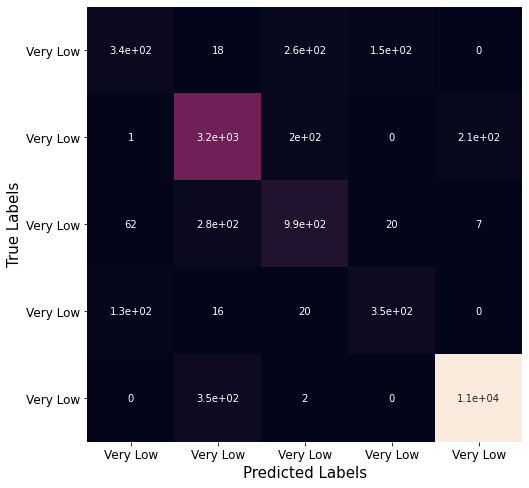

In [ ]:
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(12, 8))
cm = confusion_matrix(y_test, best_preds)
ax = sns.heatmap(cm, square=True, annot=True, cbar=False)
ax.xaxis.set_ticklabels(categories, fontsize = 12)
ax.yaxis.set_ticklabels(categories, fontsize = 12, rotation=0)
ax.set_xlabel('Predicted Labels',fontsize = 15)
ax.set_ylabel('True Labels',fontsize = 15)
plt.show()


In [ ]:
## Hyperparameter Tuning

from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV  

param_dict = {
    'max_depth':range(3,10,2),
    'min_child_weight':range(1,6,2),
    'learning_rate': [0.00001,0.001,0.01,0.1,1,2],
    'n_estimators': [10,190,200,210,500,1000,2000]
    
}

xgc = XGBClassifier(booster='gbtree', learning_rate =0.01, n_estimators=200, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'multi:softprob', nthread=4, scale_pos_weight=1, seed=27)

clf = GridSearchCV(xgc,param_dict,cv=3, n_jobs = -1).fit(X_train,y_train)

print("Tuned: {}".format(clf.best_params_)) 
print("Mean of the cv scores is {:.6f}".format(clf.best_score_))
print("Train Score {:.6f}".format(clf.score(X_train,y_train)))
print("Test Score {:.6f}".format(clf.score(X_test,y_test)))
print("Seconds used for refitting the best model on the train dataset: {:.6f}".format(clf.refit_time_))

In [ ]:
plt.figure(figsize=(12, 8))

xgb_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, xgb_pred)
ax = sns.heatmap(cm, square=True, annot=True, cbar=False)
ax.xaxis.set_ticklabels(categories, fontsize = 12)
ax.yaxis.set_ticklabels(categories, fontsize = 12, rotation=0)
ax.set_xlabel('Predicted Labels',fontsize = 15)
ax.set_ylabel('True Labels',fontsize = 15)
plt.show()

**K-Means Learning**

In [33]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=3)

In [ ]:
model.fit(X_train_n)

In [ ]:
# model score, Opposite of the value of X on the K-means objective.
print("Train score:", model.score(X_train_n))
print("Test score:",model.score(X_test_n))


In [36]:
train=[]
test=[]

for n in range(1, 10):
    model = KMeans(n_clusters=n)
    model.fit(X_train, y_train)
    
    train.append(model.score(X_train, y_train))
    test.append(model.score(X_test, y_test))


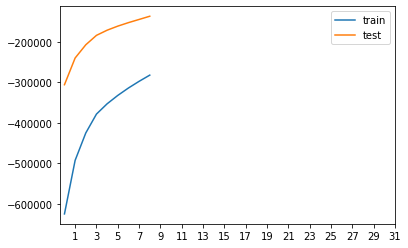

In [37]:
plt.plot(train)
plt.plot(test)
plt.legend(("train", "test"))
plt.xticks(range(1, 33, 2))
plt.show()

**Logistic Regression**


In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import sklearn as sk

In [45]:
models = LogisticRegression(random_state=42, n_jobs=-1)
cv = sk.model_selection.cross_validate(models,X_train,y_train, cv = 3, n_jobs=-1, return_estimator=True)

print("Mean training accuracy: {}".format(np.mean(cv['test_score'])))
print("Test accuracy: {}".format(cv["estimator"][0].score(X_test,y_test)))

Mean training accuracy: 0.8488889993888796
Test accuracy: 0.8432110555586765


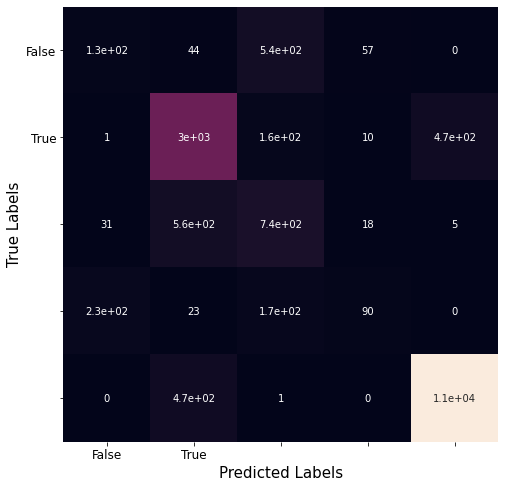

In [46]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
pred = cv["estimator"][0].predict(X_test)

cm = confusion_matrix(y_test, pred)
plt.figure(figsize=(12, 8))
ax =sns.heatmap(cm, square=True, annot=True, cbar=False)
ax.xaxis.set_ticklabels(["False","True"], fontsize = 12)
ax.yaxis.set_ticklabels(["False","True"], fontsize = 12, rotation=0)
ax.set_xlabel('Predicted Labels',fontsize = 15)
ax.set_ylabel('True Labels',fontsize = 15)
plt.show()

In [47]:
from sklearn.metrics import classification_report
print(classification_report(y_test, cv["estimator"][0].predict(X_test)))


              precision    recall  f1-score   support

           0       0.32      0.16      0.22       769
           1       0.73      0.82      0.78      3663
           2       0.46      0.55      0.50      1357
           3       0.51      0.17      0.26       517
           4       0.96      0.96      0.96     11495

    accuracy                           0.84     17801
   macro avg       0.60      0.53      0.54     17801
weighted avg       0.83      0.84      0.83     17801

